# Prior estimation

In [2]:
using MAT
include("src/main.jl")
OPTCONFIG=OptConfig(XTOLABS=1e-8, DEBUG=true);

INFO: Precompiling module MAT.


In [52]:
using MAT
function plt2mat(p, filename)
    d = [(filter(isalpha, l[:get_label]()), hcat(l[:get_data]()...)) for a in p[:axes] for l in a[:lines] ] |> Dict
    matwrite(filename, d)
end

plt2mat (generic function with 1 method)

In [3]:
# enable pyplot-latex
PyCall.PyDict(PyPlot.matplotlib["rcParams"])["text.usetex"] = true

true

## The Model

In [4]:
# exponential
xlims = (0,4)
n = 200 # was 500
ndata = 100
σ = 0.3
prior = Truncated(MixtureModel([Normal(mu, .5) for mu in [1, 3]]), xlims...)


t    = Transformation(x->exp(x), x->log(x))

Transformation(#80, #81)

In [43]:
randseed=90
srand(randseed)
#srand(2)
m = FEModel(f=x->x, xs=linspace(xlims...,n), σ=σ)
d = generatedata(m, prior, ndata);
mt   = transformmodel(m, t)

FEModel(ft, 1.0:0.2693374373524836:54.598150033144236, 0.3)

In [6]:
ncv = 20
kfold = length(d);

In [7]:
lims = ([0,4],[0,.6],[1,55], [0,.2])

([0, 4], [0.0, 0.6], [1, 55], [0.0, 0.2])

## Results

In [8]:
figsize=(4*0.8,3*0.8*0.8)

(3.2, 1.9200000000000004)

 97

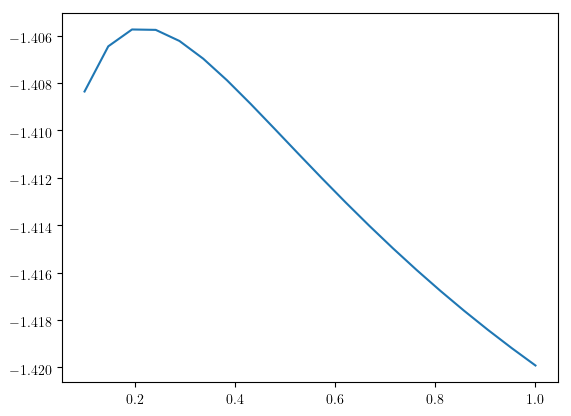

.769587 seconds (169.42 M allocations: 157.276 GiB, 16.13% gc time)


0.19473684210526315

In [9]:
## er estimator
regs = [ReferenceRegularizer(m, γ) for γ in linspace(0.1,1,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regR = regs[indmax(ss)].γ

122.

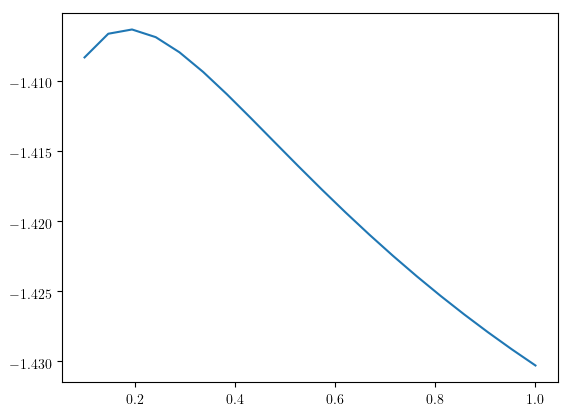

698875 seconds (174.30 M allocations: 207.048 GiB, 17.16% gc time)


0.19473684210526315

In [10]:
## er estimator transformed
regs = [ReferenceRegularizer(mt, γ) for γ in linspace(0.1,1,ncv)]
@time ss = [cvscore(mt, d, d->ebprior(mt, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regRt = regs[indmax(ss)].γ

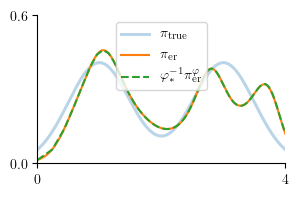

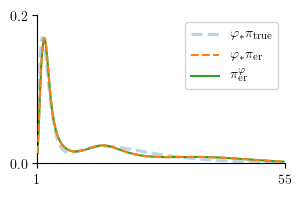

In [53]:
wR  = ebprior(m,  d, ReferenceRegularizer(m,  regR))
wRt = ebprior(mt, d, ReferenceRegularizer(mt, regRt))

p1, p2 = compareplot(m, t, pdf.(prior, m.xs), wR, wRt, "er", lims...; figsize=figsize, savename="eb$randseed")

plt2mat(p1, "er.mat")
plt2mat(p2, "erT.mat")

189.

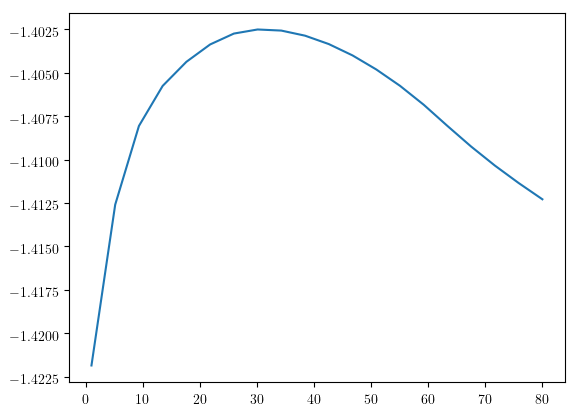

111960 seconds (175.09 M allocations: 324.924 GiB, 17.81% gc time)


30.105263157894736

In [12]:
## thik estimator
regs = [ThikonovRegularizer(γ) for γ in linspace(1,80,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regT = regs[indmax(ss)].γ

143.

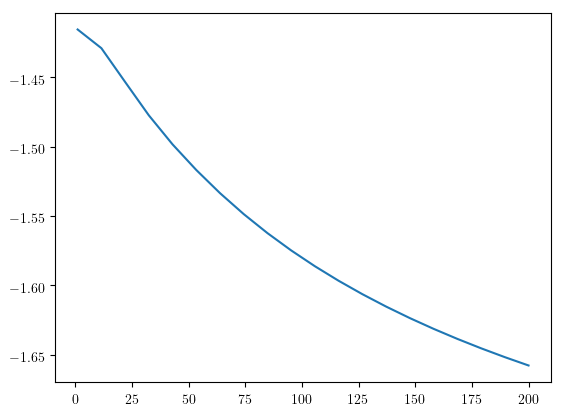

059646 seconds (173.98 M allocations: 231.001 GiB, 17.98% gc time)


1.0

In [13]:
## thik estimator transformed
regs = [ThikonovRegularizer(γ) for γ in linspace(1,200,ncv)]
@time ss = [cvscore(mt, d, d->ebprior(mt, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regTt = regs[indmax(ss)].γ

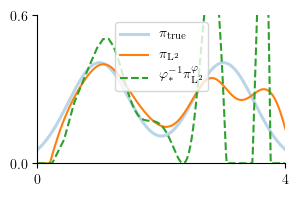

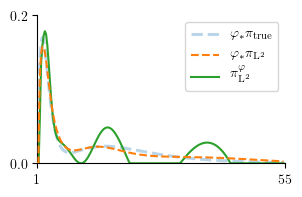

(PyPlot.Figure(PyObject <Figure size 320x192 with 1 Axes>), PyPlot.Figure(PyObject <Figure size 320x192 with 1 Axes>))

In [14]:
wT = ebprior(m,  d, ThikonovRegularizer(regT))
wTt = ebprior(mt, d, ThikonovRegularizer(regTt))

p1, p2 = compareplot(m, t, pdf.(prior, m.xs), wT, wTt, "L^2", lims...; figsize=figsize, savename="l2$randseed")

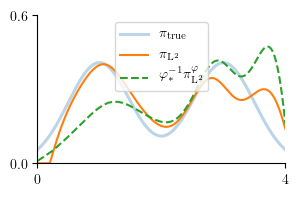

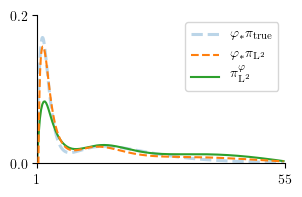

In [54]:
wT = ebprior(m,  d, ThikonovRegularizer(regT))
wTto = ebprior(mt, d, ThikonovRegularizer(regT))

p1,p2 = compareplot(m, t, pdf.(prior, m.xs), wT, wTto, "L^2", lims...; figsize=figsize, savename="l2gammafix$randseed")

plt2mat(p1, "l2.mat")
plt2mat(p2, "l2T.mat")